In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pyspedas
from pytplot import tplot, store_data, data_quants

In [2]:
trange = ["2017-01-26/08:14:59.5", "2017-01-26/08:15:01.25"]
probe = "1"
data_rate = "brst"
fgm_all = pyspedas.mms.fgm(
    trange=trange, probe=["1", "2", "3", "4"], data_rate=data_rate, time_clip=True
)

12-Oct-20 11:48:53: Loading /home/janmes/Documents/PhD/PhD-Starter-Project/mms_data/mms1/fgm/brst/l2/2017/01/26/mms1_fgm_brst_l2_20170126081303_v5.87.0.cdf
12-Oct-20 11:48:54: Loading /home/janmes/Documents/PhD/PhD-Starter-Project/mms_data/mms2/fgm/brst/l2/2017/01/26/mms2_fgm_brst_l2_20170126081303_v5.87.0.cdf
12-Oct-20 11:48:54: Loading /home/janmes/Documents/PhD/PhD-Starter-Project/mms_data/mms3/fgm/brst/l2/2017/01/26/mms3_fgm_brst_l2_20170126081303_v5.87.0.cdf
12-Oct-20 11:48:54: Loading /home/janmes/Documents/PhD/PhD-Starter-Project/mms_data/mms4/fgm/brst/l2/2017/01/26/mms4_fgm_brst_l2_20170126081303_v5.87.0.cdf
Time clip was applied to: mms1_fgm_b_gse_brst_l2
Time clip was applied to: mms1_fgm_b_gsm_brst_l2
Time clip was applied to: mms1_fgm_b_dmpa_brst_l2
Time clip was applied to: mms1_fgm_b_bcs_brst_l2
Time clip was applied to: mms1_fgm_flag_brst_l2
Problem time clipping: mms1_fgm_r_gse_brst_l2
Problem time clipping: mms1_fgm_r_gsm_brst_l2
Time clip was applied to: mms1_fgm_hira

In [3]:
Bxyz = data_quants['mms1_fgm_b_gse_brst_l2'].values[:,:3]
Bxyz_time = data_quants['mms1_fgm_b_gse_brst_l2'].coords['time'].values

12-Oct-20 11:48:56: /home/janmes/Documents/PhD/PhD-Starter-Project/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



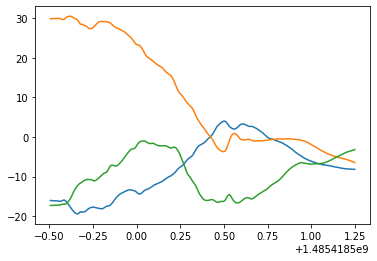

In [4]:
for i in range(3):
    plt.plot(Bxyz_time, Bxyz[:,i])
plt.show()

In [5]:
BM = np.zeros((3,3))
for i in range(3):
    for j in range(3):
        BM[i,j] = np.mean(Bxyz[:,i]*Bxyz[:,j])-np.mean(Bxyz[:,i])*np.mean(Bxyz[:,j])
print(BM)

12-Oct-20 11:48:56: /home/janmes/Documents/PhD/PhD-Starter-Project/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

[[ 51.5308075  -83.95571136 -13.26951599]
 [-83.95571136 181.06704712   5.30614471]
 [-13.26951599   5.30614471  26.35228729]]


In [23]:
bm = np.transpose(BM)
w, v = np.linalg.eig(bm)
from operator import itemgetter
N = min(enumerate(w), key=itemgetter(1))[0]
L = max(enumerate(w), key=itemgetter(1))[0]
M = np.setdiff1d(range(3), [N,L])[0]
print(L,M, N)
print(w, v)

12-Oct-20 14:39:26: /home/janmes/Documents/PhD/PhD-Starter-Project/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

0 2 1
[222.90873448   5.71337496  30.32803247] [[-0.44266168  0.81956376 -0.36382123]
 [ 0.89505843  0.37939707 -0.23436779]
 [ 0.05404664  0.4293869   0.901502  ]]


In [33]:
Blmn = np.matmul(v.T, Bxyz.T).T
# print(np.shape(v.T))
# print(np.shape(Bxyz.T))
# print(np.shape(Blmn))

import pprint as p

p.pprint(v.T)

12-Oct-20 15:10:14: /home/janmes/Documents/PhD/PhD-Starter-Project/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

array([[-0.44266168,  0.89505843,  0.05404664],
       [ 0.81956376,  0.37939707,  0.4293869 ],
       [-0.36382123, -0.23436779,  0.901502  ]])


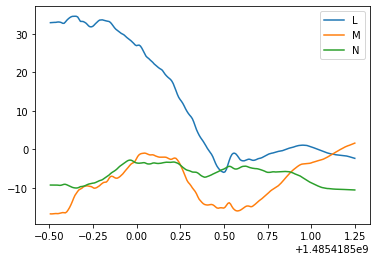

In [34]:
plt.plot(Bxyz_time, Blmn[:,L], label='L')
plt.plot(Bxyz_time, Blmn[:,M], label='M')
plt.plot(Bxyz_time, Blmn[:,N], label='N')
plt.legend()
plt.show()